In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
df=pd.read_csv("dataset_TSMC2014_NYC.csv",na_values=['#NAME?'])

In [3]:
df.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [4]:
df.tail()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854365,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013
227427,942,4a1e0ca0f964a520bf7b1fe3,4bf58dd8d48988d116941735,Bar,40.726805,-73.957422,-300,Sat Feb 16 02:35:36 +0000 2013


In [5]:
df.describe()

,userId,latitude,longitude,timezoneOffset
count,227428.000000,227428.000000,227428.000000,227428.000000
mean,535.304817,40.754045,-73.974556,-253.392019
std,305.398774,0.072458,0.086209,43.234750
min,1.000000,40.550852,-74.274766,-420.000000
25%,287.000000,40.718330,-74.000633,-240.000000
50%,523.000000,40.747745,-73.983479,-240.000000
75%,793.000000,40.778374,-73.945709,-240.000000
max,1083.000000,40.988332,-73.683825,660.000000


In [6]:
df.isnull().sum()

userId             0
venueId            0
venueCategoryId    0
venueCategory      5
latitude           0
longitude          0
timezoneOffset     0
utcTimestamp       0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

userId             0
venueId            0
venueCategoryId    0
venueCategory      0
latitude           0
longitude          0
timezoneOffset     0
utcTimestamp       0
dtype: int64

In [10]:
import datetime
data = []
for utcoffset_index, utcoffset in enumerate(df['utcTimestamp']):    
    year = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%Y')
    month = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%m')
    day = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%d')
    weekday = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%a')
    time = datetime.datetime.strptime(utcoffset, '%a %b %d %X %z %Y').strftime('%X')
    data.append([year, month, day, weekday, time])
ny_data_fe = pd.DataFrame(data, columns = ['year', 'month', 'day', 'weekday', 'time'])

for col in ny_data_fe.columns:
    if col not in ['weekday', 'time']:
        df[col] = pd.to_numeric(ny_data_fe[col])
    else:
        df[col] = ny_data_fe[col]

In [11]:
df.describe()

,userId,latitude,longitude,timezoneOffset,year,month,day
count,227423.000000,227423.000000,227423.000000,227423.000000,227418.000000,227418.000000,227418.000000
mean,535.302859,40.754045,-73.974557,-253.392313,2012.101039,6.249435,14.683693
std,305.399201,0.072459,0.086209,43.235179,0.301381,3.023353,8.151567
min,1.000000,40.550852,-74.274766,-420.000000,2012.000000,1.000000,1.000000
25%,287.000000,40.718330,-74.000633,-240.000000,2012.000000,4.000000,8.000000
50%,523.000000,40.747745,-73.983479,-240.000000,2012.000000,5.000000,14.000000
75%,793.000000,40.778374,-73.945709,-240.000000,2012.000000,8.000000,21.000000
max,1083.000000,40.988332,-73.683825,660.000000,2013.000000,12.000000,31.000000


In [12]:
df.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012.0,4.0,3.0,Tue,18:00:09
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012.0,4.0,3.0,Tue,18:00:25
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012.0,4.0,3.0,Tue,18:02:24
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012.0,4.0,3.0,Tue,18:02:41
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012.0,4.0,3.0,Tue,18:03:00


In [13]:
df.tail()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,NaN,NaN,NaN,NaN,NaN
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,NaN,NaN,NaN,NaN,NaN
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854365,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,NaN,NaN,NaN,NaN,NaN
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,NaN,NaN,NaN,NaN,NaN
227427,942,4a1e0ca0f964a520bf7b1fe3,4bf58dd8d48988d116941735,Bar,40.726805,-73.957422,-300,Sat Feb 16 02:35:36 +0000 2013,NaN,NaN,NaN,NaN,NaN


In [14]:
grouped = df.groupby(by='venueCategoryId')

for _, group in grouped:
    print(group.head())

      userId                   venueId           venueCategoryId  \
323       47  4a914773f964a520dd1920e3  4bf58dd8d48988d100941735   
377      381  4e405e39483b04e17abb677f  4bf58dd8d48988d100941735   
403      637  4a914773f964a520dd1920e3  4bf58dd8d48988d100941735   
1250      84  4ee73945e30005f8ba684170  4bf58dd8d48988d100941735   
2046     381  4e405e39483b04e17abb677f  4bf58dd8d48988d100941735   

          venueCategory   latitude  longitude  timezoneOffset  \
323   Convention Center  40.703119 -73.987736            -240   
377   Convention Center  40.631299 -73.950961            -240   
403   Convention Center  40.703119 -73.987736            -240   
1250  Convention Center  40.753072 -73.973467            -240   
2046  Convention Center  40.631299 -73.950961            -240   

                        utcTimestamp    year  month  day weekday      time  
323   Tue Apr 03 21:29:21 +0000 2012  2012.0    4.0  3.0     Tue  21:29:21  
377   Tue Apr 03 21:51:16 +0000 2012  2012.0  

In [15]:
print(df['venueCategory'].value_counts().sort_values(ascending=False).head(30))

Bar                                         15977
Home (private)                              15382
Office                                      12740
Subway                                       9347
Gym / Fitness Center                         9170
Coffee Shop                                  7510
Food & Drink Shop                            6596
Train Station                                6408
Park                                         4804
Neighborhood                                 4604
Bus Station                                  4474
Deli / Bodega                                4214
Residential Building (Apartment / Condo)     4185
Other Great Outdoors                         4134
American Restaurant                          3701
College Academic Building                    3479
Building                                     3474
Medical Center                               3366
Road                                         3207
Clothing Store                               2976


In [16]:
df.dtypes

userId               int64
venueId             object
venueCategoryId     object
venueCategory       object
latitude           float64
longitude          float64
timezoneOffset       int64
utcTimestamp        object
year               float64
month              float64
day                float64
weekday             object
time                object
dtype: object

<AxesSubplot:ylabel='Frequency'>

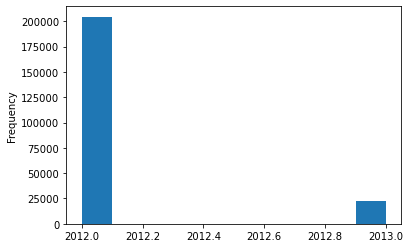

In [17]:
df['year'].plot.hist()

<AxesSubplot:>

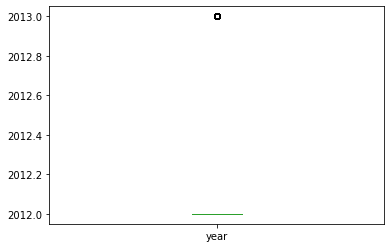

In [18]:
df['year'].plot.box()

In [19]:
# remove outlier from our dataset

In [20]:
df=df[df['year']<2012.2]   # 2013 data is removed

<AxesSubplot:ylabel='Frequency'>

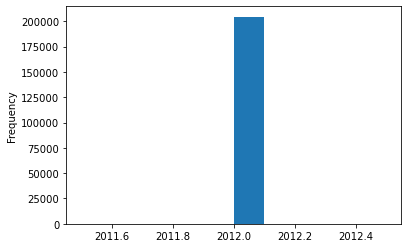

In [21]:
df['year'].plot.hist()

In [58]:
df['venueCategory'].value_counts().head(15)

Bar                                         14295
Home (private)                              13899
Office                                      11445
Subway                                       8513
Gym / Fitness Center                         7727
Coffee Shop                                  6620
Food & Drink Shop                            5995
Train Station                                5846
Park                                         4467
Bus Station                                  4102
Neighborhood                                 4061
Other Great Outdoors                         3854
Deli / Bodega                                3825
Residential Building (Apartment / Condo)     3724
American Restaurant                          3287
Name: venueCategory, dtype: int64

In [23]:
((df['venueCategory'].value_counts())/len(df['venueCategory']))*100

Bar                     6.992272
Home (private)          6.798572
Office                  5.598220
Subway                  4.164058
Gym / Fitness Center    3.779593
                          ...   
Pet Service             0.001467
Motorcycle Shop         0.000978
Photography Lab         0.000978
Castle                  0.000978
Music School            0.000489
Name: venueCategory, Length: 251, dtype: float64

Text(0, 0.5, 'Number of check-ins')

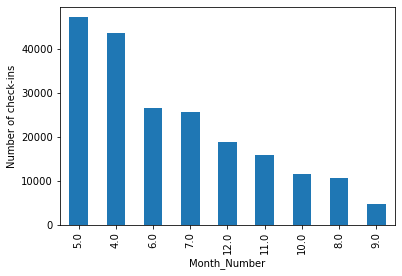

In [84]:
df['month'].value_counts().head(12).plot.bar()
mtp.xlabel("Month_Number")
mtp.ylabel("Number of check-ins")

In [41]:
(((df['month'].value_counts())/len(df['month']))*100).head(30)

5.0     23.093328
4.0     21.381824
6.0     12.950499
7.0     12.517609
12.0     9.166014
11.0     7.708863
10.0     5.667678
8.0      5.188808
9.0      2.325377
Name: month, dtype: float64

Text(0, 0.5, 'Percentage number of check-ins')

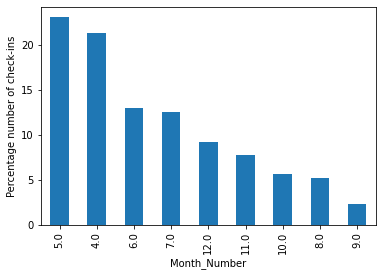

In [83]:
(((df['month'].value_counts())/len(df['month']))*100).head(30).plot.bar()
mtp.xlabel("Month_Number")
mtp.ylabel("Percentage number of check-ins")

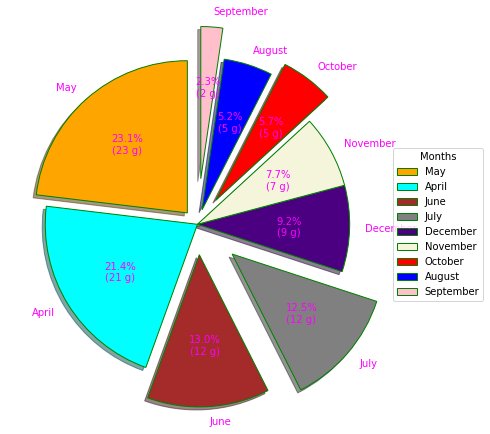

In [51]:
Months = ['May','April','June','July','December','November','October','August','September']
  
data = [23.09,21.38,12.95,12.51,9.16,7.70,5.66,5.18,2.32]

explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.2,0.1,0.3) 

colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige","Red","Blue","pink") 

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

def func(pct, allvalues): 
    absolute = int(pct / 100.*nm.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig, ax = mtp.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = months, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
ax.legend(wedges, Months, 
          title ="Months", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))  
  
# show plot 
mtp.show() 

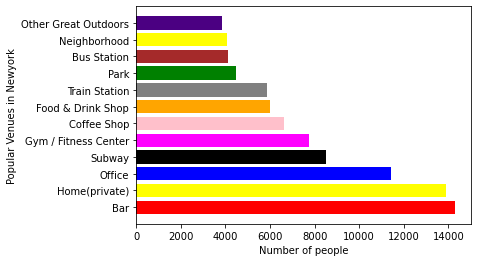

In [77]:
# df['venueCategory'].value_counts().head(15).plot.barh()

labels = ['Bar','Home(private)','Office','Subway','Gym / Fitness Center','Coffee Shop','Food & Drink Shop','Train Station','Park','Bus Station','Neighborhood','Other Great Outdoors']                                       
            
values = [14295,13899,11445,8513,7727,6620,5995,5846,4467,4102,4061,3854]

# Change the bar colors here
mtp.barh(labels, values, color=['red','yellow','blue','black','magenta','pink','orange','grey','green','brown','yellow','indigo'])

mtp.xlabel("Number of people")
mtp.ylabel('Popular Venues in Newyork')
mtp.show()



In [81]:
(((df['venueCategory'].value_counts())/len(df['venueCategory']))*100).head(12)

Bar                     6.992272
Home (private)          6.798572
Office                  5.598220
Subway                  4.164058
Gym / Fitness Center    3.779593
Coffee Shop             3.238114
Food & Drink Shop       2.932401
Train Station           2.859519
Park                    2.184993
Bus Station             2.006457
Neighborhood            1.986402
Other Great Outdoors    1.885150
Name: venueCategory, dtype: float64

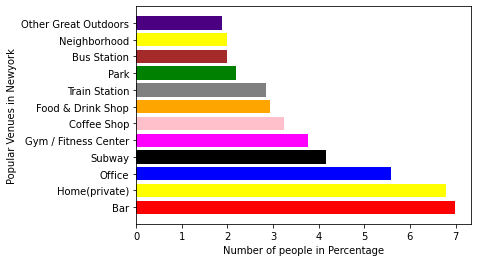

In [82]:
labels = ['Bar','Home(private)','Office','Subway','Gym / Fitness Center','Coffee Shop','Food & Drink Shop','Train Station','Park','Bus Station','Neighborhood','Other Great Outdoors']                                       
            
values = [6.99,6.79,5.59,4.16,3.77,3.23,2.93,2.85,2.18,2.00,1.98,1.88]

# Change the bar colors here
mtp.barh(labels, values, color=['red','yellow','blue','black','magenta','pink','orange','grey','green','brown','yellow','indigo'])

mtp.xlabel("Number of people in Percentage")
mtp.ylabel('Popular Venues in Newyork')
mtp.show()


In [29]:
from scipy.stats import ttest_ind

In [30]:
bars=df[df['venueCategory']=='Bar']

In [31]:
bars

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,year,month,day,weekday,time
149,272,4f318c84e5e8657f88d830ac,4bf58dd8d48988d112941735,Bar,40.725730,-73.792527,-240,Tue Apr 03 19:42:24 +0000 2012,2012.0,4.0,3.0,Tue,19:42:24
207,445,4bae5fb6f964a520b4a93be3,4bf58dd8d48988d112941735,Bar,40.731786,-73.983701,-240,Tue Apr 03 20:21:06 +0000 2012,2012.0,4.0,3.0,Tue,20:21:06
208,516,4f297e04a17c6fd5208ea108,4bf58dd8d48988d116941735,Bar,40.758847,-73.989551,-240,Tue Apr 03 20:21:12 +0000 2012,2012.0,4.0,3.0,Tue,20:21:12
233,798,3fd66200f964a520e1f01ee3,4bf58dd8d48988d11d941735,Bar,40.827207,-73.926031,-240,Tue Apr 03 20:39:38 +0000 2012,2012.0,4.0,3.0,Tue,20:39:38
339,84,4a859ca3f964a520a5fe1fe3,4bf58dd8d48988d11b941735,Bar,40.752752,-73.973054,-240,Tue Apr 03 21:35:09 +0000 2012,2012.0,4.0,3.0,Tue,21:35:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204336,88,3fd66200f964a520f6e61ee3,4bf58dd8d48988d1d8941735,Bar,40.733694,-74.002121,-300,Mon Dec 31 20:35:45 +0000 2012,2012.0,12.0,31.0,Mon,20:41:02
204399,185,4ea4acaab80355a982afff79,4bf58dd8d48988d1d4941735,Bar,40.965339,-74.062832,-300,Mon Dec 31 22:22:33 +0000 2012,2012.0,12.0,31.0,Mon,22:27:39
204404,244,4fe0eda4e4b0085f8737a2cc,4bf58dd8d48988d11e941735,Bar,40.775526,-73.953303,-300,Mon Dec 31 22:27:39 +0000 2012,2012.0,12.0,31.0,Mon,22:36:47
204441,659,4e4712d7b61c03d0cd158c78,4bf58dd8d48988d1d4941735,Bar,40.730186,-73.983568,-300,Mon Dec 31 23:44:28 +0000 2012,2012.0,12.0,31.0,Mon,23:54:15


Text(0, 0.5, 'number of check-in')

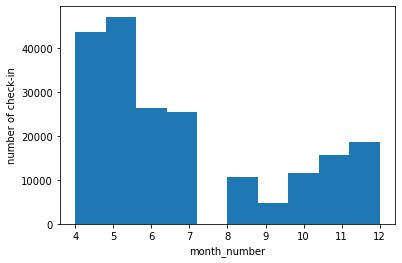

In [79]:
df['month'].plot.hist()
mtp.xlabel("month_number")
mtp.ylabel("number of check-in")

<AxesSubplot:ylabel='Frequency'>

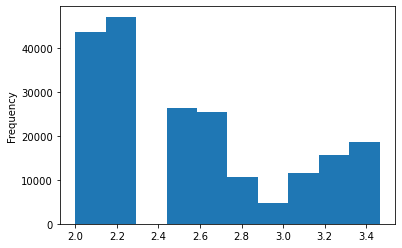

In [33]:
nm.sqrt(df['month']).plot.hist()   #Variable Transformation